In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
df = pd.read_csv('train.csv')

# Display the first few rows of the dataset
print(df.head())


             qtype                                           Question  \
0   susceptibility  Who is at risk for Lymphocytic Choriomeningiti...   
1         symptoms  What are the symptoms of Lymphocytic Choriomen...   
2   susceptibility  Who is at risk for Lymphocytic Choriomeningiti...   
3  exams and tests  How to diagnose Lymphocytic Choriomeningitis (...   
4        treatment  What are the treatments for Lymphocytic Chorio...   

                                              Answer  
0  LCMV infections can occur after exposure to fr...  
1  LCMV is most commonly recognized as causing ne...  
2  Individuals of all ages who come into contact ...  
3  During the first phase of the disease, the mos...  
4  Aseptic meningitis, encephalitis, or meningoen...  


In [4]:
# Get basic information about the dataset
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16407 entries, 0 to 16406
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   qtype     16407 non-null  object
 1   Question  16407 non-null  object
 2   Answer    16407 non-null  object
dtypes: object(3)
memory usage: 384.7+ KB
None


In [5]:
# Check for missing values
print(df.isnull().sum())

qtype       0
Question    0
Answer      0
dtype: int64


In [6]:
# Display basic statistics of numerical columns
print(df.describe())


              qtype                          Question  \
count         16407                             16407   
unique           16                             14979   
top     information  What causes Causes of Diabetes ?   
freq           4535                                20   

                                                   Answer  
count                                               16407  
unique                                              15817  
top     This condition is inherited in an autosomal re...  
freq                                                  348  


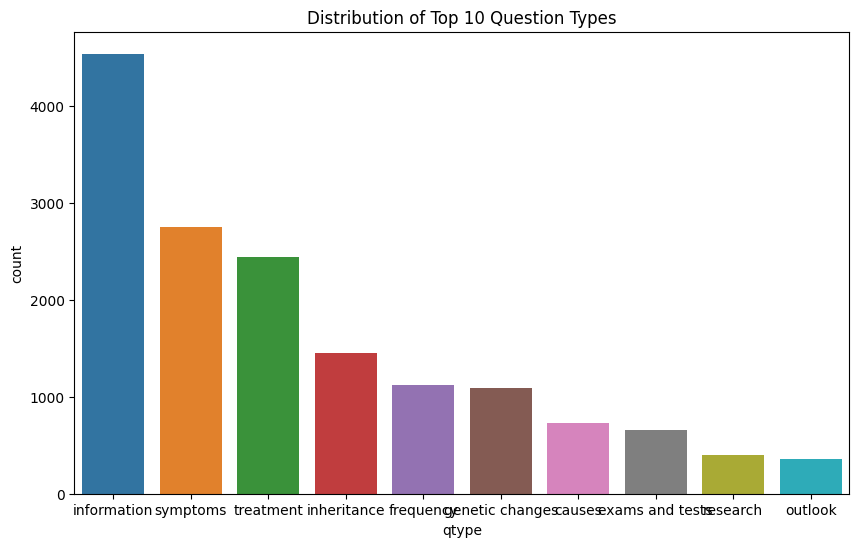

In [9]:
# Get the top 10 question types
top_10_qtypes = df['qtype'].value_counts().nlargest(10).index

# Filter the dataframe for the top 10 question types
df_top_10 = df[df['qtype'].isin(top_10_qtypes)]

# Explore the distribution of the top 10 question types
plt.figure(figsize=(10, 6))
sns.countplot(x='qtype', data=df_top_10, order=top_10_qtypes)
plt.title('Distribution of Top 10 Question Types')
plt.show()


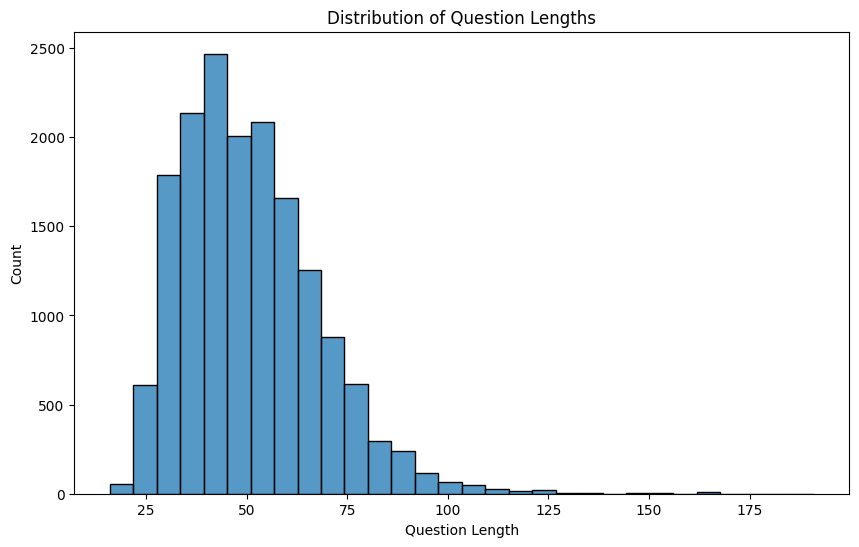

In [11]:
# Explore the distribution of question lengths
df['question_length'] = df['Question'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['question_length'], bins=30)
plt.title('Distribution of Question Lengths')
plt.xlabel('Question Length')
plt.show()

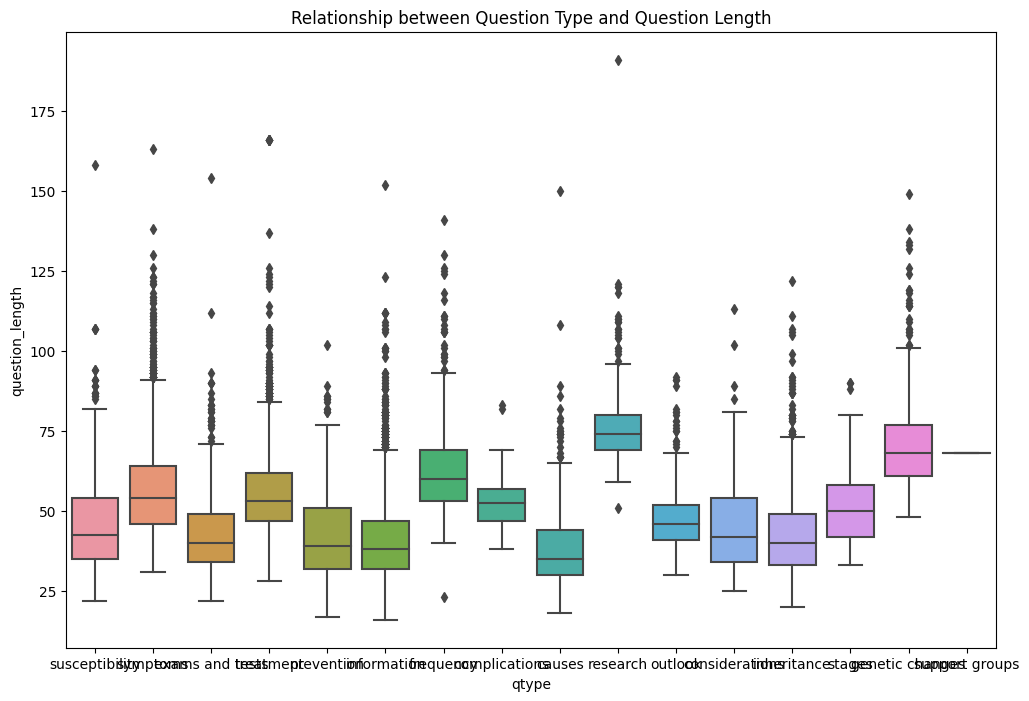

In [12]:
# Explore the relationship between 'qtype' and 'question_length'
plt.figure(figsize=(12, 8))
sns.boxplot(x='qtype', y='question_length', data=df)
plt.title('Relationship between Question Type and Question Length')
plt.show()


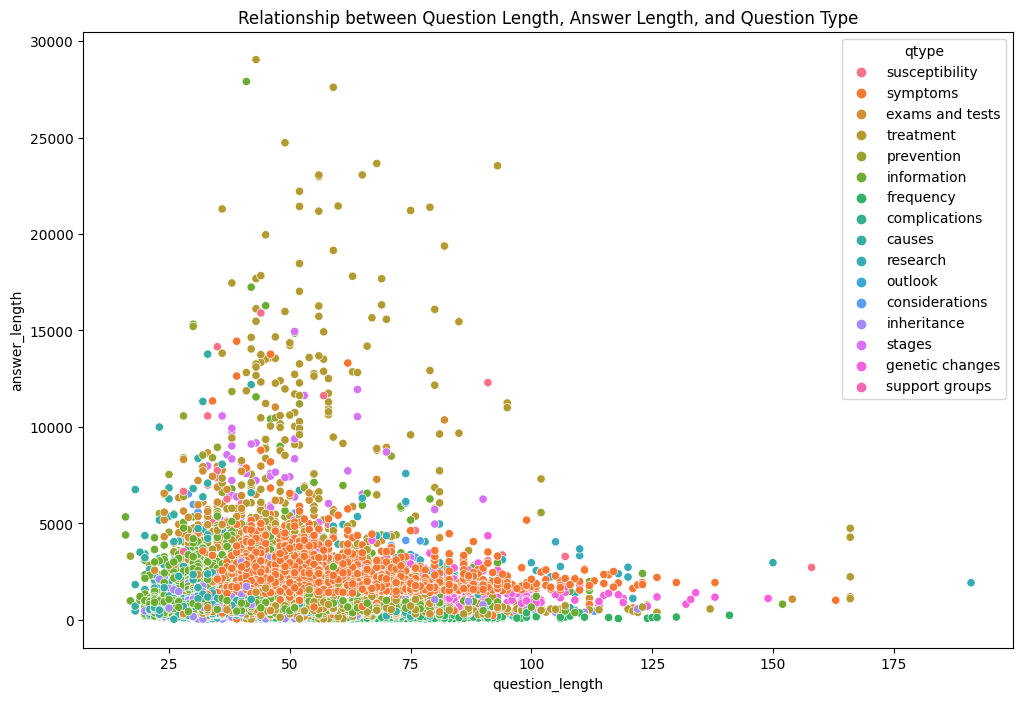

In [14]:
# Explore the relationship between 'qtype', 'question_length', and 'answer_length'
df['answer_length'] = df['Answer'].apply(len)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='question_length', y='answer_length', hue='qtype', data=df)
plt.title('Relationship between Question Length, Answer Length, and Question Type')
plt.show()


In [15]:
# Handle missing values if any
# For example, you can fill missing values with the mean or mode
df.fillna(df.mean(), inplace=True)

# Remove temporary columns created for analysis
df.drop(['question_length', 'answer_length'], axis=1, inplace=True)


<ipython-input-15-4f0c4ed35ae4>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


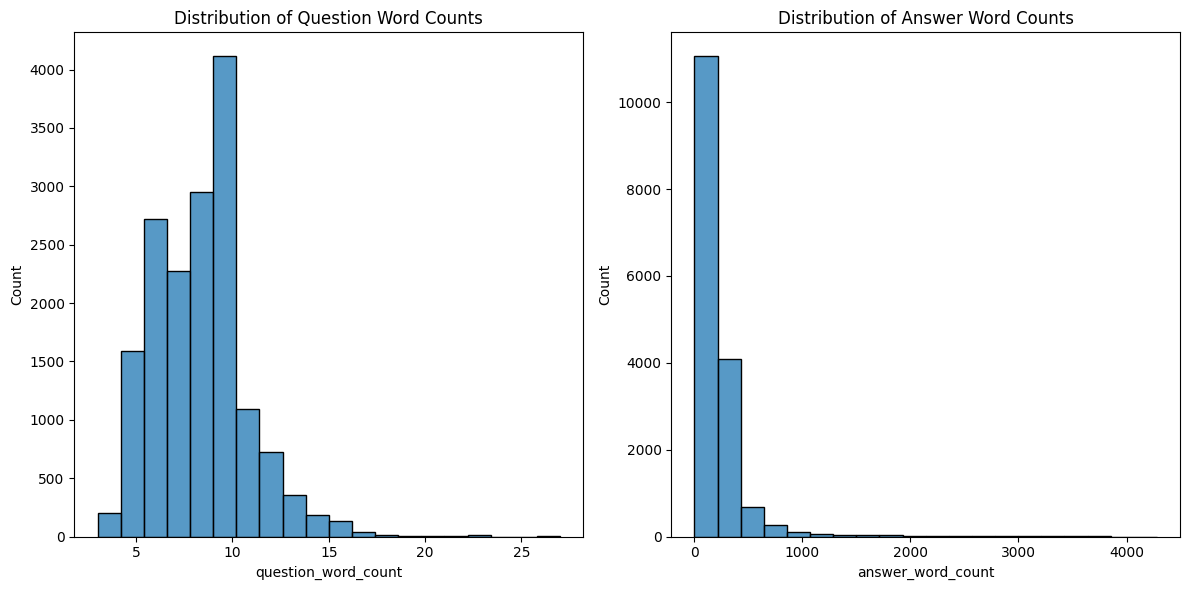

In [19]:

# Create a new feature: word count in questions
df['question_word_count'] = df['Question'].apply(lambda x: len(str(x).split()))

# Create a new feature: word count in answers
df['answer_word_count'] = df['Answer'].apply(lambda x: len(str(x).split()))

# Visualize the distribution of word counts in questions and answers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['question_word_count'], bins=20)
plt.title('Distribution of Question Word Counts')

plt.subplot(1, 2, 2)
sns.histplot(df['answer_word_count'], bins=20)
plt.title('Distribution of Answer Word Counts')

plt.tight_layout()
plt.show()


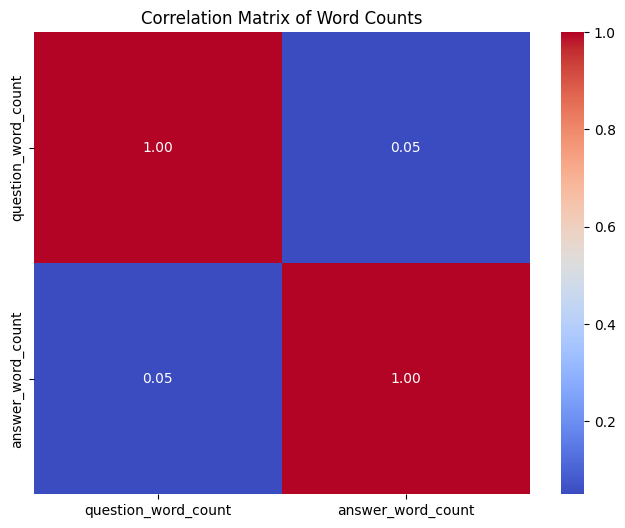

In [20]:
# Compute the correlation matrix
correlation_matrix = df[['question_word_count', 'answer_word_count']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Word Counts')
plt.show()


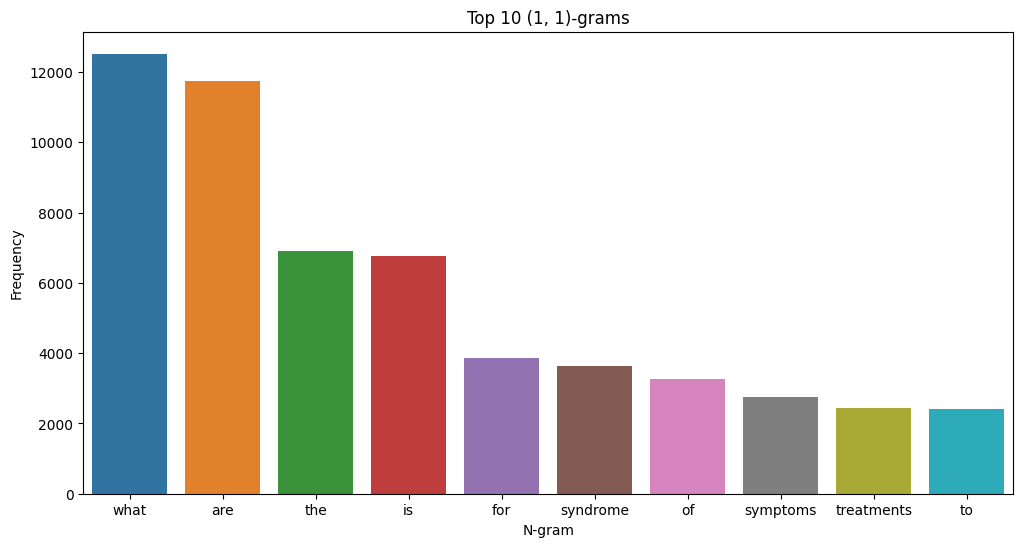

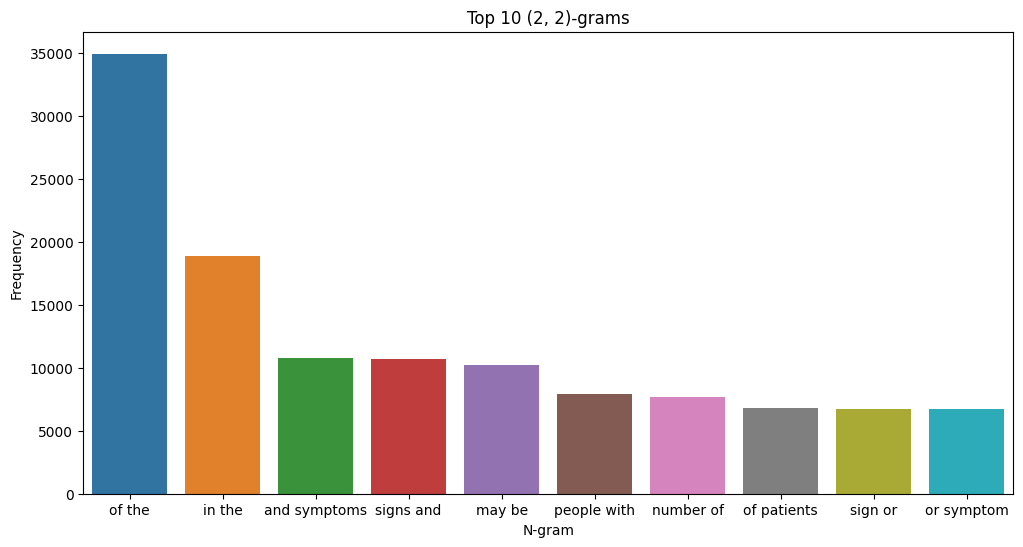

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to plot the top n n-grams
def plot_top_ngrams(text, ngram_range=(1, 1), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    ngrams = vectorizer.fit_transform(text)
    ngrams_sum = ngrams.sum(axis=0)
    ngrams_freq = [(word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:top_n]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=[word[0] for word in ngrams_freq], y=[word[1] for word in ngrams_freq])
    plt.title(f'Top {top_n} {ngram_range}-grams')
    plt.xlabel('N-gram')
    plt.ylabel('Frequency')
    plt.show()

# Plot top unigrams in questions
plot_top_ngrams(df['Question'], ngram_range=(1, 1), top_n=10)

# Plot top bigrams in answers
plot_top_ngrams(df['Answer'], ngram_range=(2, 2), top_n=10)


In [20]:
def simple_retriever(query, dataset):
    # Simple keyword-based retrieval
    relevant_passages = [row["Answer"] for _, row in dataset.iterrows() if query.lower() in row["Question"].lower()]

    return relevant_passages


In [14]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

generator_model = GPT2LMHeadModel.from_pretrained('gpt2')
generator_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [25]:
def rag_model(query, dataset):
    # Retrieve passages
    passages = simple_retriever(query, dataset)

    # Generate response
    if passages:
        context = f"Query: {query}\nPassages:\n" + "\n".join(passages)
        inputs = generator_tokenizer(context, return_tensors="pt", max_length=2056, truncation=True)
        outputs = generator_model.generate(**inputs)
        response = generator_tokenizer.decode(outputs[0], skip_special_tokens=True)
    else:
        response = "I couldn't find relevant information for the given query."

    return response


In [26]:
import pandas as pd

# Load your dataset (assuming it's in a CSV file)
dataset_path = "train.csv"
dataset = pd.read_csv(dataset_path)

# Query for testing
query = "what are marine toxins?"

# Get the response
result = rag_model(query, dataset)
print(result)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1281: UserWarning: Input length of input_ids is 51, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(


Query: what are marine toxins?
Passages:
Marine toxins are naturally occurring chemicals that can contaminate certain seafood. The seafood contaminated with these chemicals frequently looks, smells, and tastes normal. When humans eat such seafood, disease can result.



In [27]:
query = "what can i do to prevent poisoning by marine toxins?"

In [28]:
# Get the response
result = rag_model(query, dataset)
print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1281: UserWarning: Input length of input_ids is 25, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(


Query: what can i do to prevent poisoning by marine toxins?
Passages:
General guidelines for safe seafood consumption:



In [30]:
query = "What is (are) Desmoplastic small round cell tumor ?"
result = rag_model(query, dataset)
print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1281: UserWarning: Input length of input_ids is 147, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(


Query: What is (are) Desmoplastic small round cell tumor?
Passages:
Desmoplastic small round cell tumors (DSRCT), a rare malignant cancer, is a soft tissue sarcoma that usually affects young boys and men and is found most often in the abdomen. Its name means that it is formed by small, round cancer cells surrounded by scarlike tissue. The most common symptoms include abdominal pain, abdominal mass and symptoms of gastrointestinal obstruction. DSRCTs are treated first with chemotherapy, then with surgery to remove the tumor, if possible. Radiation therapy is sometimes given, depending on the tumor. In addition, some people with DSRCT are candidates for a bone marrow transplant.



In [31]:
query = "Who is at risk for Lymphocytic Choriomeningitis (LCM)?"
result = rag_model(query, dataset)
print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1281: UserWarning: Input length of input_ids is 265, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(


Query: Who is at risk for Lymphocytic Choriomeningitis (LCM)?
Passages:
LCMV infections can occur after exposure to fresh urine, droppings, saliva, or nesting materials from infected rodents.  Transmission may also occur when these materials are directly introduced into broken skin, the nose, the eyes, or the mouth, or presumably, via the bite of an infected rodent. Person-to-person transmission has not been reported, with the exception of vertical transmission from infected mother to fetus, and rarely, through organ transplantation.
Individuals of all ages who come into contact with urine, feces, saliva, or blood of wild mice are potentially at risk for infection. Owners of pet mice or hamsters may be at risk for infection if these animals originate from colonies that were contaminated with LCMV, or if their animals are infected from other wild mice. Human fetuses are at risk of acquiring infection vertically from an infected mother. 
                
Laboratory workers who work with 

In [ ]:
!pip install nltk
!pip install datasets
!pip install transformers[torch]
!pip install tokenizers

!pip install rouge_score
!pip install sentencepiece
!pip install huggingface_hub

In [2]:
!pip install evaluate

In [5]:
!pip install wandb

In [3]:
import nltk
import evaluate
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from datasets import load_dataset,Dataset, DatasetDict
from transformers import T5Tokenizer, DataCollatorForSeq2Seq
from transformers import T5ForConditionalGeneration,AutoTokenizer, Seq2SeqTrainingArguments, Seq2SeqTrainer,Trainer, TrainingArguments

In [91]:
import wandb

# Replace 'your_api_key' with your actual API key
wandb.login(key="5240eb9b74893c2c30bdac988a6a46b14960ce8e")

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [9]:
dataset = pd.read_csv('train.csv')
dataset = dataset.drop('qtype', axis=1) # why ?
dataset = dataset.rename(columns={'Question': 'question', 'Answer': 'answer'})

In [17]:
df_full_train, df_test = train_test_split(dataset, test_size=0.2, random_state=56)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=56)

In [18]:
df_test

,question,answer
6591,Is Aarskog-Scott syndrome inherited ?,Aarskog-Scott syndrome is inherited in an X-li...
3531,What is (are) Prescription and Illicit Drug Ab...,Marijuana is the most abused illicit drug amon...
566,What is (are) Pelizaeus-Merzbacher Disease ?,"Pelizaeus-Merzbacher disease (PMD) is a rare, ..."
8616,Is cystinosis inherited ?,This condition is inherited in an autosomal re...
6780,What are the genetic changes related to primar...,Primary ciliary dyskinesia can result from mut...
...,...,...
8699,How many people are affected by ovarian cancer ?,"Ovarian cancer affects about 12 in 100,000 wom..."
2727,What are the treatments for Small Cell Lung Ca...,Key Points\n - There are di...
2513,What to do for Hashimoto's Disease ?,Iodine is an essential mineral for the thyroid...
9590,What are the genetic changes related to argini...,Mutations in the GATM gene cause arginine:glyc...


In [19]:
# df_train = df_train.reset_index(drop=True)
# df_val = df_train.reset_index(drop=True)
# df_test = df_train.reset_index(drop=True)

train_dataset = Dataset.from_pandas(df_train)
val_dataset = Dataset.from_pandas(df_val)
test_dataset = Dataset.from_pandas(df_test)

In [20]:
train_dataset

Dataset({
    features: ['question', 'answer', '__index_level_0__'],
    num_rows: 10500
})

In [21]:
val_dataset

Dataset({
    features: ['question', 'answer', '__index_level_0__'],
    num_rows: 2625
})

In [22]:
test_dataset

Dataset({
    features: ['question', 'answer', '__index_level_0__'],
    num_rows: 3282
})

In [23]:
# Load the tokenizer, model, and data collator
MODEL_NAME = "google/flan-t5-base"

tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)
model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [24]:
# We prefix our tasks with "answer the question"
prefix = "Please answer this question: "

# Define the preprocessing function

def preprocess_function(examples):
   """Add prefix to the sentences, tokenize the text, and set the labels"""
   # The "inputs" are the tokenized answer:
   inputs = [prefix + doc for doc in examples["question"]]
   model_inputs = tokenizer(inputs, max_length=128, truncation=True)

   # The "labels" are the tokenized outputs:
   labels = tokenizer(text_target=examples["answer"],
                      max_length=512,
                      truncation=True)

   model_inputs["labels"] = labels["input_ids"]
   return model_inputs

In [27]:
# Map the preprocessing function across our dataset
tokenized_dataset_train = train_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/10500 [00:00<?, ? examples/s]

In [28]:
tokenized_dataset

Dataset({
    features: ['question', 'answer', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 10500
})

In [29]:
tokenized_dataset_val = val_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2625 [00:00<?, ? examples/s]

In [30]:
tokenized_dataset_test = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/3282 [00:00<?, ? examples/s]

In [31]:
nltk.download("punkt", quiet=True)
metric = evaluate.load("rouge")

In [32]:
def compute_metrics(eval_preds):
   preds, labels = eval_preds

   # decode preds and labels
   labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
   decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
   decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

   # rougeLSum expects newline after each sentence
   decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
   decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

   result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

   return result

In [34]:
# Global Parameters
L_RATE = 3e-4
BATCH_SIZE = 3
PER_DEVICE_EVAL_BATCH = 4
WEIGHT_DECAY = 0.01
SAVE_TOTAL_LIM = 3
NUM_EPOCHS = 3

# Set up training arguments
training_args = Seq2SeqTrainingArguments(
   output_dir="/results",
   evaluation_strategy="epoch",
   learning_rate=L_RATE,
   report_to=None,
   per_device_train_batch_size=BATCH_SIZE,
   per_device_eval_batch_size=PER_DEVICE_EVAL_BATCH,
   weight_decay=WEIGHT_DECAY,
   save_total_limit=SAVE_TOTAL_LIM,
   num_train_epochs=NUM_EPOCHS,
   predict_with_generate=True,
   push_to_hub=False
)

In [35]:
trainer = Seq2SeqTrainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_dataset_train,
   eval_dataset=tokenized_dataset_test,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics
)

In [36]:
# Free GPU memory
torch.cuda.empty_cache()

In [37]:
trainer.train()

wandb: Currently logged in as: sharmavishek2000. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,1.681700,1.517730,0.151773,0.093778,0.138512,0.145601
2,1.487800,1.429492,0.148680,0.095156,0.137309,0.144063
3,1.416500,1.403726,0.153273,0.097815,0.140985,0.147698


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


TrainOutput(global_step=10500, training_loss=1.5885872105189731, metrics={'train_runtime': 7540.7715, 'train_samples_per_second': 4.177, 'train_steps_per_second': 1.392, 'total_flos': 1079202998375424.0, 'train_loss': 1.5885872105189731, 'epoch': 3.0})

In [60]:
last_checkpoint = "/results/checkpoint-10000"

finetuned_model = T5ForConditionalGeneration.from_pretrained(last_checkpoint)
tokenizer = T5Tokenizer.from_pretrained(last_checkpoint)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [61]:
my_question = "what are marine toxins?"
inputs = "Please answer to this question: " + my_question
inputs = tokenizer(inputs, return_tensors="pt")
print(inputs)
outputs = finetuned_model.generate(**inputs)
answer = tokenizer.decode(outputs[0])
print(answer)

In [64]:
my_question = "what are the symptoms of cancer?"
inputs = "Please answer to this question: " + my_question
inputs = tokenizer(inputs, return_tensors="pt")
print(inputs)
outputs = finetuned_model.generate(**inputs)
answer = tokenizer.decode(outputs[0])
print(answer)

{'input_ids': tensor([[ 863, 1525,   12,   48,  822,   10,  125,   33,    8, 3976,   13, 1874,
           58,    1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
<pad>Signs and symptoms of cancer include a lump or pain in the abdomen. These and other
